In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.manual_seed(1)

Text(0.5, 0, 'x')

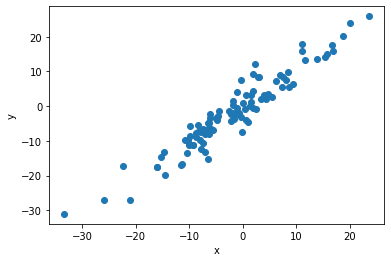

In [3]:
X = torch.randn(100, 1) * 10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [4]:
# X = torch.randn(100,1) * 10
# Y = X + 3 * torch.randn(100,1)
# plt.scatter(X, Y)

In [5]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [6]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
[w, b]= model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [8]:
# making it more clean
[w, b]= model.parameters()
def get_params():
    return w[0][0].item(), b[0].item()

In [9]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

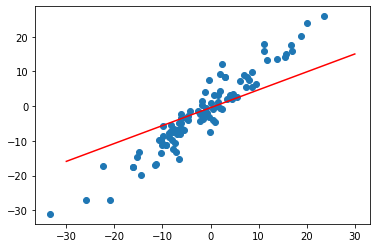

In [10]:
plot_fit('Initial Model')

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())

    # to append all the losses as history
    losses.append(loss)
    # since gradients accumulate, we have to reset them
    optimizer.zero_grad()
    # to calculate the gradient of the loss function
    loss.backward()
    # to update the weights
    optimizer.step()

epoch: 0 loss: 37.701290130615234
epoch: 1 loss: 36.5147819519043
epoch: 2 loss: 35.379066467285156
epoch: 3 loss: 34.291996002197266
epoch: 4 loss: 33.25142288208008
epoch: 5 loss: 32.25541687011719
epoch: 6 loss: 31.30202865600586
epoch: 7 loss: 30.389450073242188
epoch: 8 loss: 29.515932083129883
epoch: 9 loss: 28.679834365844727
epoch: 10 loss: 27.8795223236084
epoch: 11 loss: 27.113447189331055
epoch: 12 loss: 26.380172729492188
epoch: 13 loss: 25.678298950195312
epoch: 14 loss: 25.006479263305664
epoch: 15 loss: 24.3634090423584
epoch: 16 loss: 23.747861862182617
epoch: 17 loss: 23.158672332763672
epoch: 18 loss: 22.594703674316406
epoch: 19 loss: 22.054872512817383
epoch: 20 loss: 21.538145065307617
epoch: 21 loss: 21.043540954589844
epoch: 22 loss: 20.570106506347656
epoch: 23 loss: 20.116933822631836
epoch: 24 loss: 19.683155059814453
epoch: 25 loss: 19.267946243286133
epoch: 26 loss: 18.87051010131836
epoch: 27 loss: 18.49008560180664
epoch: 28 loss: 18.125940322875977
epoch:

Text(0.5, 0, 'epoch')

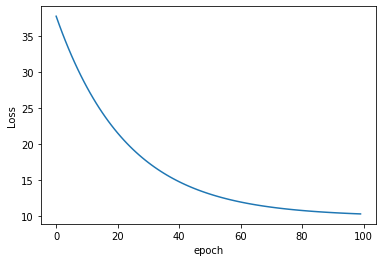

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

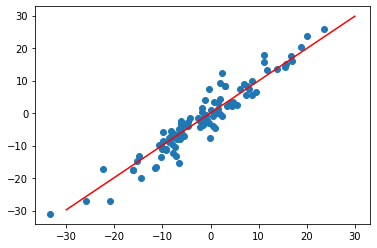

In [14]:
plot_fit("Trained Model")